In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('tableau-colorblind10')
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial import Voronoi, voronoi_plot_2d
from google.colab import drive
drive.mount('/content/drive')
from google.colab import files

Mounted at /content/drive


In [2]:
X = pd.read_csv("/content/drive/MyDrive/AI/Assessment1/dungeon_sensorstats.csv")
column_select = ['height', 'weight']
X_subset = X[column_select]

In [3]:
X_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   height  10000 non-null  int64
 1   weight  10000 non-null  int64
dtypes: int64(2)
memory usage: 156.4 KB


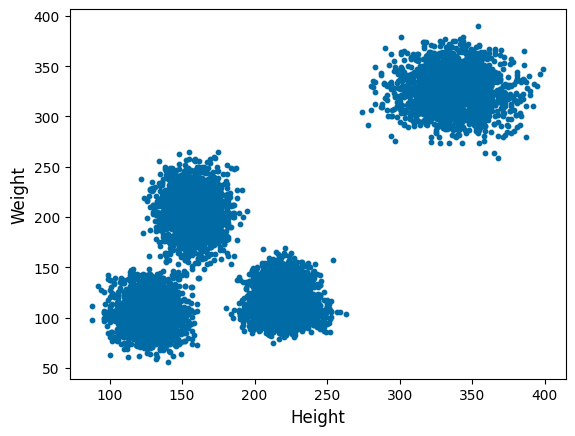

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
fig, ax = plt.subplots()
ax.scatter(X_subset['height'], X_subset['weight'], s=10)
ax.set_xlabel('Height', fontsize=12)
ax.set_ylabel('Weight', fontsize=12)
plt.savefig("HW.pdf", format="pdf", dpi=300, bbox_inches="tight")
plt.show()
files.download("HW.pdf")

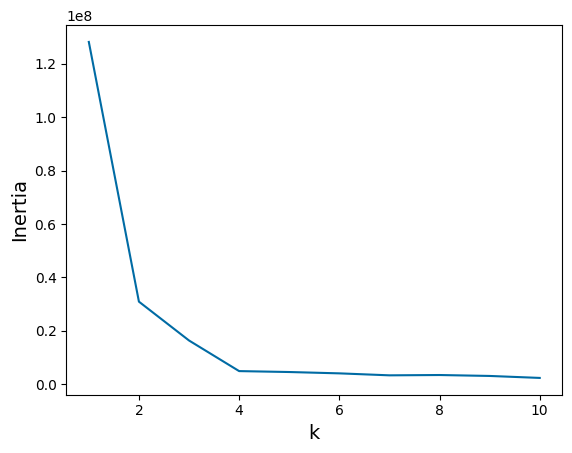

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
inertias = []

K=10
for k in range(1, K+1):

    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_subset)
    calculate_inertia = kmeans.inertia_
    inertias.append(calculate_inertia)

plt.figure()
plt.plot(range(1, K+1), inertias)
plt.xlabel('k', fontsize=14);
plt.ylabel('Inertia', fontsize=14);
plt.savefig("elbow.pdf", format="pdf", dpi=300, bbox_inches="tight")
plt.show()
files.download("elbow.pdf")

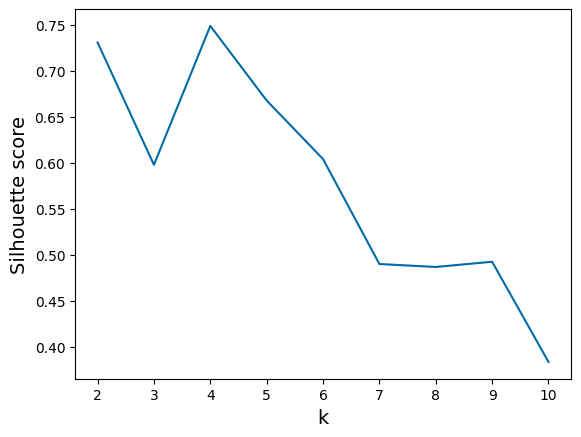

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Optimal_k: 4


In [5]:
silhouette_scores = []
K = 10
for k in range(2, K+1):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X_subset)
  silhouette_scores.append(silhouette_score(X_subset, kmeans.labels_))

plt.figure()
plt.plot(range(2, K+1), silhouette_scores)
plt.xlabel('k', fontsize=14);
plt.ylabel('Silhouette score', fontsize=14);
plt.savefig("silhouette.pdf", format="pdf", dpi=300, bbox_inches="tight")
plt.show()
files.download("silhouette.pdf")

optimal_k = np.arange(2, K+1)[np.argmax(silhouette_scores)]
print(f"Optimal_k: {optimal_k}")

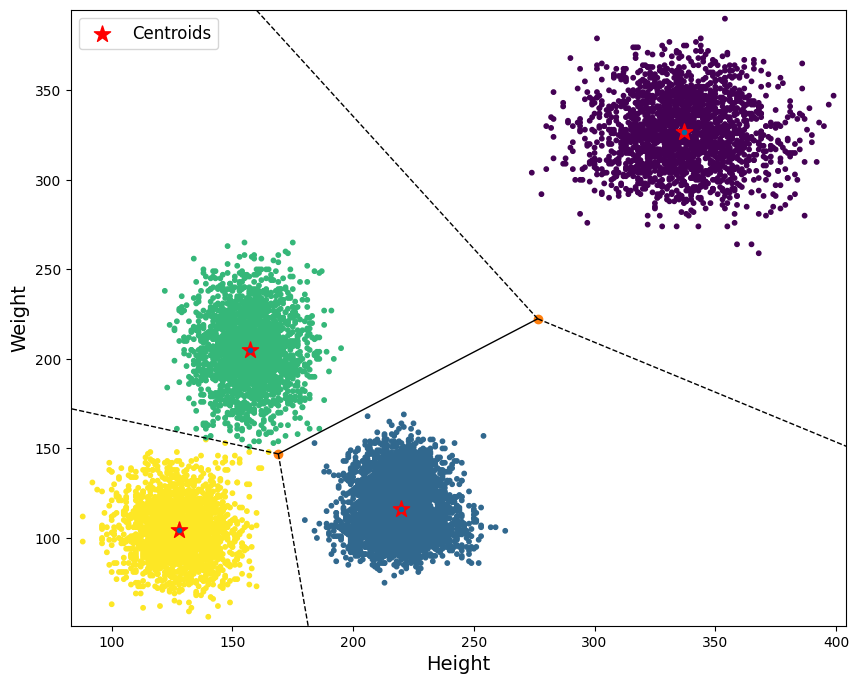

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_subset)

fig, ax1 = plt.subplots(figsize=(10,8))
voronoi_plot_2d(Voronoi(kmeans.cluster_centers_), ax=ax1)
ax1.scatter(X_subset['height'], X_subset['weight'], c=kmeans.labels_, s=10)
ax1.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c = 'red', s = 150, marker='*', label = 'Centroids')
ax1.legend(fontsize=12)
ax1.set_xlim(X_subset['height'].min() - 5, X_subset['height'].max() + 5)
ax1.set_ylim(X_subset['weight'].min() - 5, X_subset['weight'].max() + 5)
ax1.set_xlabel('Height', fontsize=14)
ax1.set_ylabel('Weight', fontsize=14)

plt.savefig("voronoi.pdf", format="pdf", dpi=300, bbox_inches="tight")
plt.show()
files.download("voronoi.pdf")

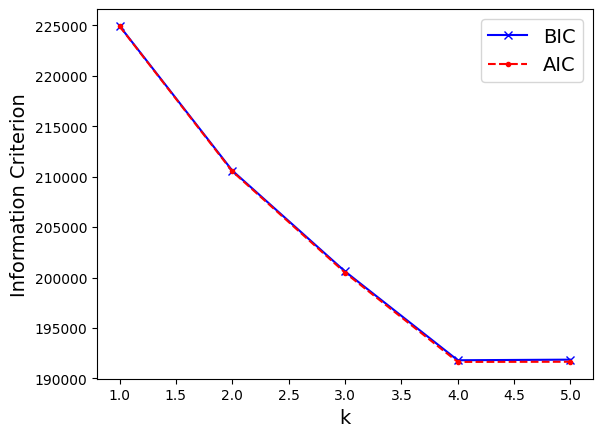

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Optimak k (bic): 4
Optimak k (aic): 4


In [7]:
from sklearn.mixture import GaussianMixture
from sklearn.mixture import GaussianMixture as GMM

# Generate a plot showing the aic and bic scores
bics = []
aics = []
K = 5
for k in range(1, K+1):
    gmm = GMM(n_components=k, random_state=42)
    gmm.fit(X_subset)

    bics.append(gmm.bic(X_subset))
    aics.append(gmm.aic(X_subset))

# Plot the scores
plt.figure();
plt.plot(range(1, K+1), bics, 'bx-', label='BIC');
plt.plot(range(1, K+1), aics, 'r.--', label='AIC');
plt.xlabel('k', fontsize=14);
plt.ylabel('Information Criterion', fontsize=14);
plt.legend(fontsize=14);
plt.savefig("abic.pdf", format="pdf", dpi=300, bbox_inches="tight")
plt.show()
files.download("abic.pdf")

optimal_k_bic = np.arange(1, K+1)[np.argmin(bics)]
optimal_k_aic = np.arange(1, K+1)[np.argmin(aics)]
print(f"Optimak k (bic): {optimal_k_bic}")
print(f"Optimak k (aic): {optimal_k_aic}")

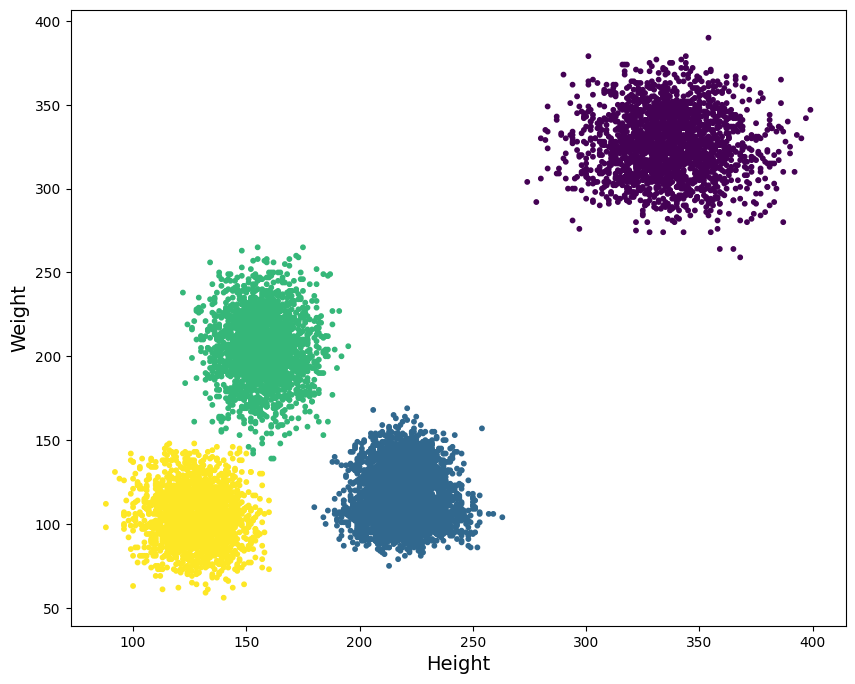

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [32]:
gmm = GaussianMixture(n_components=optimal_k_aic, random_state=42)
gmm.fit(X_subset)
gmm_labels = gmm.predict(X_subset)

fig, ax2 = plt.subplots(figsize=(10,8))
ax2.scatter(X_subset['height'], X_subset['weight'], c=gmm_labels, s=10)
ax2.set_xlabel('Height', fontsize=14)
ax2.set_ylabel('Weight', fontsize=14)
ax2.autoscale()
plt.savefig("gmm.pdf", format="pdf", dpi=300, bbox_inches="tight")
plt.show()
files.download("gmm.pdf")